<a href="https://colab.research.google.com/github/nelli46m/food_inspection_analysis/blob/main/N_M_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preprocessing:
Students will clean and preprocess the Chicago Food Inspections dataset, handling missing values, outliers, and data inconsistencies. They will perform data transformations, such as converting data types, and handle categorical variables appropriately. Your target variable is Results column. You should solve for binary classification Pass and fail, you can drop other values of target to solve only for binary target.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy import stats

In [ ]:
path_to_csv_file = '/content/drive/MyDrive/ACA_Final_Project/data/Food_Inspections.csv'
df = pd.read_csv(path_to_csv_file)
print(df.head())

   Inspection ID                         DBA Name  \
0        2578598                MUAH COTTON CANDY   
1        2578595                             ANOR   
2        2578572                         WINGSTOP   
3        2578553             Carnivale Restaurant   
4        2578539  BODY ENERGY CLUB - LINCOLN PARK   

                          AKA Name  License # Facility Type             Risk  \
0                MUAH COTTON CANDY  2891392.0    Restaurant  Risk 2 (Medium)   
1                             ANOR  2912401.0    Restaurant    Risk 1 (High)   
2                         WINGSTOP  2713278.0    Restaurant    Risk 1 (High)   
3             Carnivale Restaurant  1488939.0    Restaurant    Risk 1 (High)   
4  BODY ENERGY CLUB - LINCOLN PARK  2901216.0    Restaurant  Risk 2 (Medium)   

                 Address     City State      Zip  ...             Results  \
0    835 N MICHIGAN AVE   CHICAGO    IL  60611.0  ...                Pass   
1    1450 W WEBSTER AVE   CHICAGO    IL  60614

## Handling Missing Values

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values (drop rows with any missing values)
df.dropna(inplace=True)

# Confirm that missing values are handled
print("Missing Values after Handling:")
print(df.isnull().sum())

Missing Values:
Inspection ID                     0
DBA Name                          0
AKA Name                       2483
License #                         8
Facility Type                  5074
Risk                             79
Address                           0
City                            187
State                            53
Zip                              85
Inspection Date                   0
Inspection Type                   1
Results                           0
Violations                    70056
Latitude                        878
Longitude                       878
Location                        878
Historical Wards 2003-2015     4357
Zip Codes                       878
Community Areas                4357
Census Tracts                   916
Wards                          4357
dtype: int64
Missing Values after Handling:
Inspection ID                 0
DBA Name                      0
AKA Name                      0
License #                     0
Facility Type       

## Handling Outliers

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns

# Calculate z-scores for numeric columns
z_scores = np.abs(stats.zscore(df[numeric_columns]))

# Set the outlier threshold (e.g., 3 standard deviations)
outlier_threshold = 3

# Find outlier rows
outliers = np.where(z_scores > outlier_threshold)

# Remove outliers
df.drop(df.index[outliers[0]], inplace=True)

# Check the summary statistics after handling outliers
print("Summary Statistics after Handling Outliers:")
print(df.describe())

Summary Statistics after Handling Outliers:
       Inspection ID     License #            Zip       Latitude  \
count   1.802350e+05  1.802350e+05  180235.000000  180235.000000   
mean    1.698147e+06  1.650383e+06   60628.294782      41.877356   
std     7.040276e+05  9.391438e+05      17.016857       0.081580   
min     4.424700e+04  0.000000e+00   60601.000000      41.644670   
25%     1.300507e+06  1.225984e+06   60614.000000      41.817743   
50%     1.931803e+06  2.003608e+06   60625.000000      41.889813   
75%     2.301208e+06  2.327382e+06   60642.000000      41.938779   
max     2.578598e+06  4.074913e+06   60661.000000      42.021064   

           Longitude  Historical Wards 2003-2015      Zip Codes  \
count  180235.000000               180235.000000  180235.000000   
mean      -87.672512                   27.423525   18167.144728   
std         0.051437                   14.593019    6204.899463   
min       -87.829818                    1.000000    4299.000000   
25%     

## Data Transformations

In [ ]:
print(df.columns)


Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards'],
      dtype='object')


In [ ]:
# Convert date columns to datetime data type
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])

# Handle categorical variables
# For binary classification, you can map 'Pass' as 1 and 'Fail' as 0.
df['Results'] = df['Results'].map({'Pass': 1, 'Fail': 0})

# Drop other values of the target variable
# Assuming you want to solve only for binary classification (Pass and Fail)
df = df[df['Results'].isin([0, 1])]

# Drop unnecessary columns (if any) that may not contribute to the analysis or modeling
# For example, dropping 'Inspection ID'.
columns_to_drop = ['Inspection ID']
df.drop(columns=columns_to_drop, inplace=True)

# Confirm the unique values of the target variable (should only be 0 and 1)
print("Unique Values of the Target Variable 'Results':")
print(df['Results'].unique())

Unique Values of the Target Variable 'Results':
[1. 0.]


<ipython-input-26-78d34681c83d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


# 2. Exploratory Data Analysis (EDA):
Students will conduct exploratory data analysis to gain insights into the food inspections in Chicago. They will identify trends, patterns, and correlations in the data using visualizations and statistical analysis. Students may explore questions such as the most common violations, factors influencing inspection results, or the relationship between establishment types and inspection results.

## Temporal Trends by Month

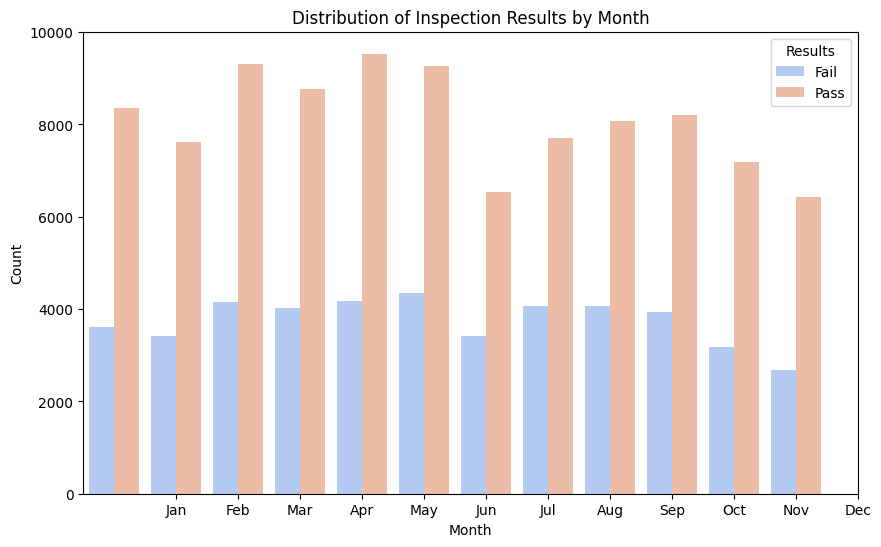

In [ ]:
# Convert 'Inspection Date' to datetime and extract month
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
df['Month'] = df['Inspection Date'].dt.month

# Plot the distribution of inspection results by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Results', data=df, palette='coolwarm')
plt.title("Distribution of Inspection Results by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Results", labels=["Fail", "Pass"])
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Correlation Matrix

<ipython-input-28-35d10418b3ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


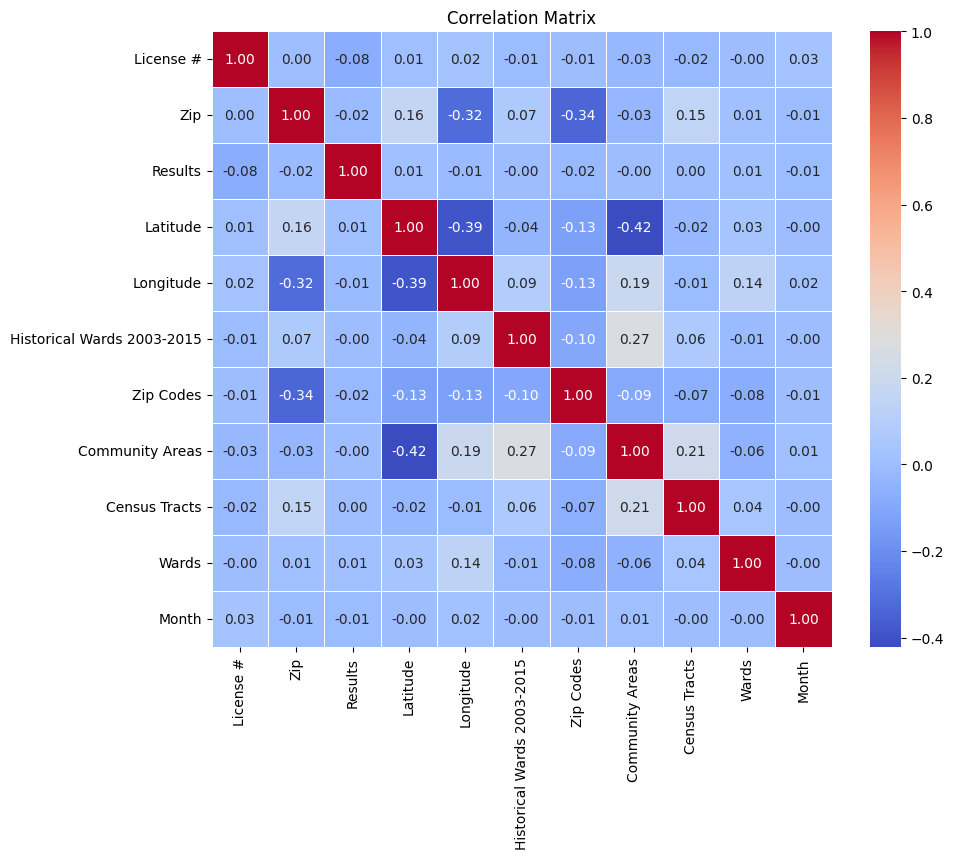

In [ ]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## Geospatial Analysis

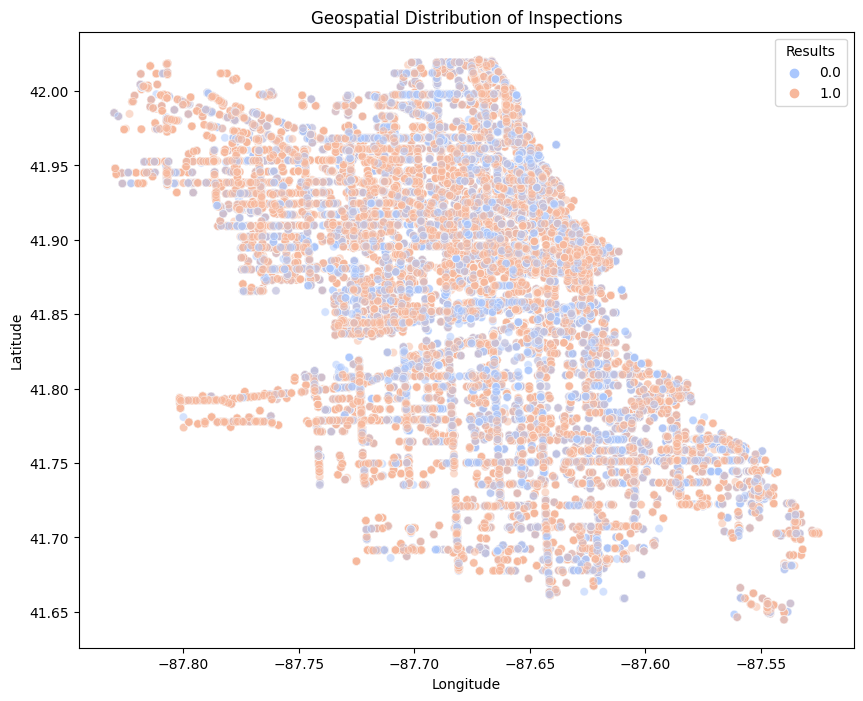

In [ ]:
# Plot geospatial distribution of inspections using latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Results', data=df, alpha=0.5, palette='coolwarm')
plt.title("Geospatial Distribution of Inspections")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Risk Level Analysis

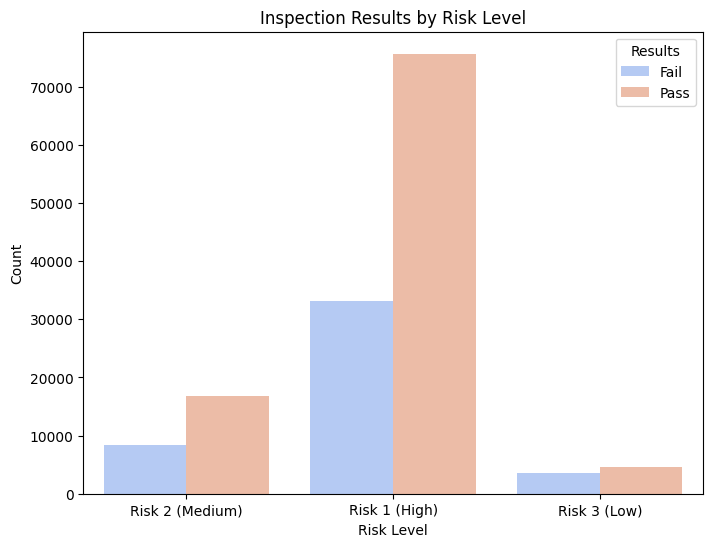

In [ ]:
# Countplot to show inspection results by risk level
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk', hue='Results', data=df, palette='coolwarm')
plt.title("Inspection Results by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.legend(title="Results", labels=["Fail", "Pass"])
plt.show()


## Facility Type Analysis

<Figure size 1200x600 with 0 Axes>

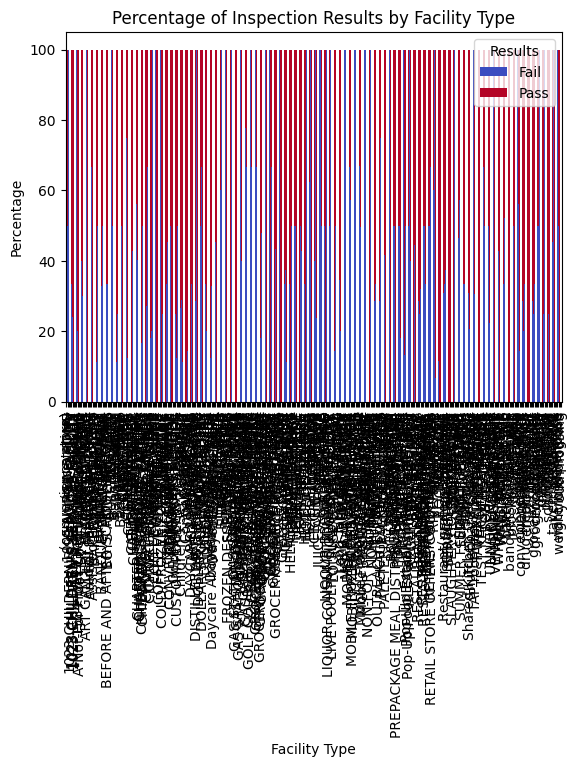

In [ ]:
# Calculate the percentage of pass and fail results for each facility type
facility_type_counts = df.groupby(['Facility Type', 'Results']).size().unstack().fillna(0)
facility_type_percentage = facility_type_counts.div(facility_type_counts.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart to show inspection results by facility type
plt.figure(figsize=(12, 6))
facility_type_percentage.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Percentage of Inspection Results by Facility Type")
plt.xlabel("Facility Type")
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.legend(title="Results", labels=["Fail", "Pass"])
plt.show()



## Time Since Last Inspection

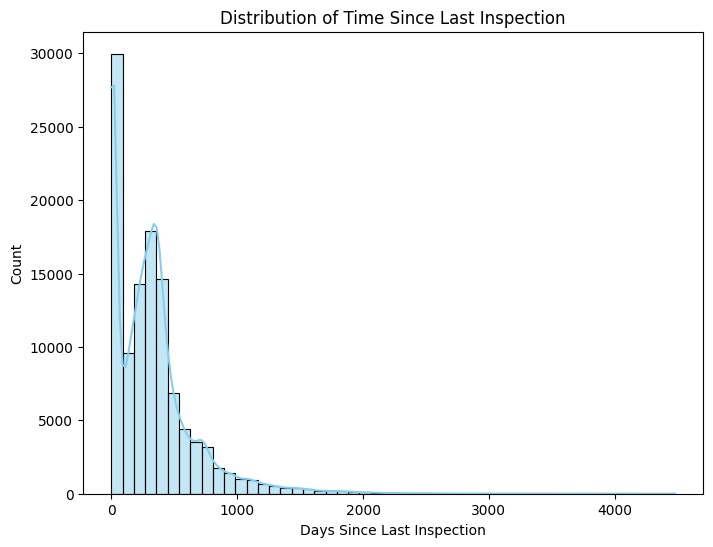

In [ ]:
# Calculate the time since the last inspection for each establishment
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
df_sorted = df.sort_values(by=['License #', 'Inspection Date'])
df['Time Since Last Inspection'] = df_sorted.groupby('License #')['Inspection Date'].diff().dt.days

# Plot the distribution of time since last inspection
plt.figure(figsize=(8, 6))
sns.histplot(df['Time Since Last Inspection'].dropna(), bins=50, kde=True, color='skyblue')
plt.title("Distribution of Time Since Last Inspection")
plt.xlabel("Days Since Last Inspection")
plt.ylabel("Count")
plt.show()


## Results Over Time

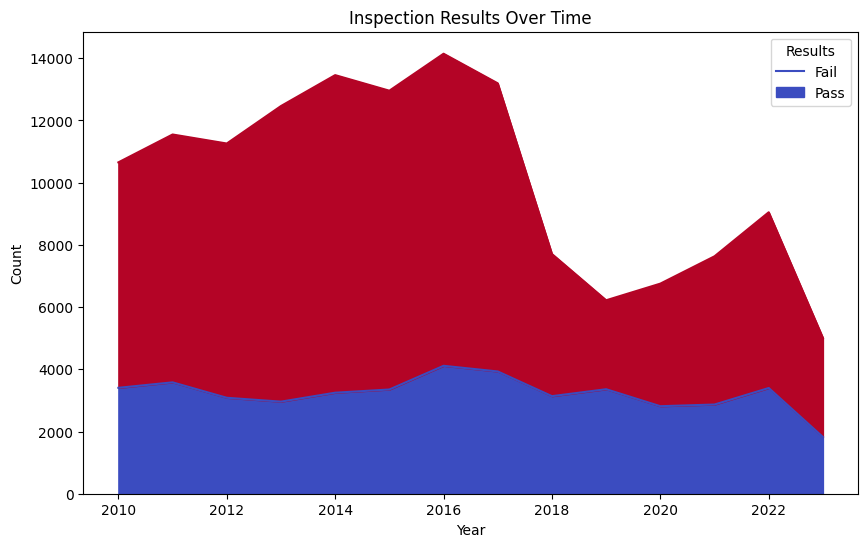

In [ ]:
# Group inspections by year and results to track changes over time
df['Year'] = df['Inspection Date'].dt.year
results_over_time = df.groupby(['Year', 'Results']).size().unstack().fillna(0)

# Plot a stacked area chart to show results over time
results_over_time.plot(kind='area', stacked=True, figsize=(10, 6), cmap='coolwarm')
plt.title("Inspection Results Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Results", labels=["Fail", "Pass"])
plt.show()


# 3. Feature Engineering:
Students will derive new features from the existing dataset to enhance the predictive power of the models. They may create variables such as average violations per establishment type, the time since the last inspection, or indicators for certain high-risk violations.

## Average Violations per Establishment Type

In [ ]:
# Step 1: Feature Engineering - Average Violations per Establishment Type
average_violations_per_type = df.groupby('Facility Type')['Results'].mean()
df['Average Violations per Type'] = df['Facility Type'].map(average_violations_per_type)


## Time Since Last Inspection

In [ ]:
# Step 2: Feature Engineering - Time Since Last Inspection
df.sort_values(by='Inspection Date', inplace=True)  # Sort data by inspection date in ascending order
df['Time Since Last Inspection'] = df.groupby('License #')['Inspection Date'].diff().dt.days
df['Time Since Last Inspection'].fillna(0, inplace=True)  # Fill missing values with 0 for the first inspection


## Indicators for High-Risk Violations

In [ ]:
# Step 3: Feature Engineering - Indicators for High-Risk Violations
high_risk_violations = ['Inadequate Handwashing', 'Food Contamination', 'Presence of Pests', 'Temperature Control']

# Fill missing values in 'Violations' column with an empty string
df['Violations'].fillna('', inplace=True)

for violation in high_risk_violations:
    df[violation + ' Indicator'] = df['Violations'].str.contains(violation).astype(int)


## Location-Based Features

In [ ]:
# Step 4: Feature Engineering - Indicators for Common Facility Types
common_facility_types = ['Restaurant', 'Grocery Store', 'School', 'Bakery']

# Fill missing values in 'Facility Type' column with 'Unknown'
df['Facility Type'].fillna('Unknown', inplace=True)

for facility_type in common_facility_types:
    df[facility_type + ' Indicator'] = df['Facility Type'].str.contains(facility_type).astype(int)



## Time-Based Features

In [ ]:
# Step 5: Feature Engineering - Time-Based Features
# Extract month and year from the 'Inspection Date' column
df['Inspection Month'] = df['Inspection Date'].dt.month
df['Inspection Year'] = df['Inspection Date'].dt.year


# 4. Model Building:
Students will build predictive models to estimate inspection results based on the Chicago Food Inspections dataset. They will explore various algorithms, such as logistic regression, decision trees, random forests, or gradient boosting, and select the most suitable model for the task. They will train the model on a subset of the dataset and tune hyperparameters for optimal performance.


In [ ]:
# Separate features (X) and target variable (y)
X = df.drop('Results', axis=1)  # Features (all columns except 'Results')
y = df['Results']  # Target variable 'Results'

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Initialize OneHotEncoder
ohe = OneHotEncoder()

# Fit and transform the categorical columns for X_train
categorical_columns = ['Facility Type']  # Add other categorical columns if needed
X_train_encoded = ohe.fit_transform(X_train[categorical_columns]).toarray()

# Combine encoded categorical columns and numerical columns
X_train_final = np.concatenate((X_train_encoded, X_train.select_dtypes(include=np.number)), axis=1)

# Handle missing values in X_train_final
imputer = SimpleImputer(strategy='mean')
X_train_final_imputed = imputer.fit_transform(X_train_final)

# Initialize the models
logistic_regression_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Evaluate models using cross-validation
models = {
    'Logistic Regression': logistic_regression_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model
}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train_final_imputed, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} - Mean Accuracy: {scores.mean():.4f}, Std: {scores.std():.4f}")


Logistic Regression - Mean Accuracy: 0.6831, Std: 0.0002
Decision Tree - Mean Accuracy: 0.6464, Std: 0.0028
Random Forest - Mean Accuracy: 0.7064, Std: 0.0019


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Combine training and test data for OneHotEncoder fitting
combined_data = pd.concat([X_train[categorical_columns], X_test[categorical_columns]], axis=0)

# Initialize OneHotEncoder and fit it on the combined data
ohe = OneHotEncoder()
ohe.fit(combined_data)

# Fit and transform the categorical columns for X_train and X_test
X_train_encoded = ohe.transform(X_train[categorical_columns]).toarray()
X_test_encoded = ohe.transform(X_test[categorical_columns]).toarray()

# Combine encoded categorical columns and numerical columns for both X_train and X_test
X_train_final = np.concatenate((X_train_encoded, X_train.select_dtypes(include=np.number)), axis=1)
X_test_final = np.concatenate((X_test_encoded, X_test.select_dtypes(include=np.number)), axis=1)

# Handle missing values in X_train_final and X_test_final using the same imputer as before
imputer = SimpleImputer(strategy='mean')
X_train_final_imputed = imputer.fit_transform(X_train_final)
X_test_final_imputed = imputer.transform(X_test_final)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train_final_imputed, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test_final_imputed)

# Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Random Forest Model Evaluation:
Accuracy: 0.7055
Confusion Matrix:
[[ 2962  6080]
 [ 2287 17084]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.33      0.41      9042
         1.0       0.74      0.88      0.80     19371

    accuracy                           0.71     28413
   macro avg       0.65      0.60      0.61     28413
weighted avg       0.68      0.71      0.68     28413



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Combine training and test data for OneHotEncoder fitting
combined_data = pd.concat([X_train[categorical_columns], X_test[categorical_columns]], axis=0)

# Initialize OneHotEncoder and fit it on the combined data
ohe = OneHotEncoder()
ohe.fit(combined_data)

# Fit and transform the categorical columns for X_train and X_test
X_train_encoded = ohe.transform(X_train[categorical_columns]).toarray()
X_test_encoded = ohe.transform(X_test[categorical_columns]).toarray()

# Combine encoded categorical columns and numerical columns for both X_train and X_test
X_train_final = np.concatenate((X_train_encoded, X_train.select_dtypes(include=np.number)), axis=1)
X_test_final = np.concatenate((X_test_encoded, X_test.select_dtypes(include=np.number)), axis=1)

# Handle missing values in X_train_final and X_test_final using the same imputer as before
imputer = SimpleImputer(strategy='mean')
X_train_final_imputed = imputer.fit_transform(X_train_final)
X_test_final_imputed = imputer.transform(X_test_final)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Define a reduced hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],   # Number of trees in the forest
    'max_depth': [10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]    # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV with the Random Forest model and hyperparameter grid
grid_search = GridSearchCV(random_forest_model, param_grid, cv=3, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train_final_imputed, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the model on the full training data with the best hyperparameters
best_random_forest_model = RandomForestClassifier(random_state=42, **best_params)
best_random_forest_model.fit(X_train_final_imputed, y_train)

# Make predictions on the test data
y_pred = best_random_forest_model.predict(X_test_final_imputed)

# Evaluate the model's performance on the test data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Random Forest Model Evaluation:")
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Random Forest Model Evaluation:
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7164
Confusion Matrix:
[[ 1464  7578]
 [  481 18890]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.16      0.27      9042
         1.0       0.71      0.98      0.82     19371

    accuracy                           0.72     28413
   macro avg       0.73      0.57      0.55     28413
weighted avg       0.73      0.72      0.65     28413



# 5. Model Evaluation:
Students will evaluate the performance of their models using appropriate metrics such as accuracy, precision, recall, or the Area Under the Receiver Operating Characteristic curve (ROC-AUC). Students must select objective metric(s). They will compare the results of different models and choose the best-performing model based on evaluation metrics.

## Logistic Regression Model Evaluation:


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Fit the Logistic Regression model on the training data
logistic_regression_model.fit(X_train_final_imputed, y_train)

# Make predictions on the test data
y_pred_lr = logistic_regression_model.predict(X_test_final_imputed)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, logistic_regression_model.predict_proba(X_test_final_imputed)[:, 1])

# Print evaluation results
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"ROC-AUC: {roc_auc_lr:.4f}")


Logistic Regression Model Evaluation:
Accuracy: 0.6822
Precision: 0.6828
Recall: 0.9973
ROC-AUC: 0.5653


## Decision Tree Model Evaluation:


In [ ]:
# Fit the Decision Tree model on the training data
decision_tree_model.fit(X_train_final_imputed, y_train)

# Make predictions on the test data
y_pred_dt = decision_tree_model.predict(X_test_final_imputed)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test_final_imputed)[:, 1])

# Print evaluation results
print("Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"ROC-AUC: {roc_auc_dt:.4f}")


Decision Tree Model Evaluation:
Accuracy: 0.6491
Precision: 0.7468
Recall: 0.7342
ROC-AUC: 0.6006


## Random Forest Model Evaluation:


In [ ]:
# Fit the Random Forest model on the training data
random_forest_model.fit(X_train_final_imputed, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test_final_imputed)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, random_forest_model.predict_proba(X_test_final_imputed)[:, 1])

# Print evaluation results
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")


Random Forest Model Evaluation:
Accuracy: 0.7055
Precision: 0.7375
Recall: 0.8819
ROC-AUC: 0.6746


In [ ]:
# Create a dictionary to store the evaluation results of each model
model_evaluations = {
    'Logistic Regression': {
        'Accuracy': accuracy_lr,
        'Precision': precision_lr,
        'Recall': recall_lr,
        'ROC-AUC': roc_auc_lr
    },
    'Decision Tree': {
        'Accuracy': accuracy_dt,
        'Precision': precision_dt,
        'Recall': recall_dt,
        'ROC-AUC': roc_auc_dt
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'ROC-AUC': roc_auc_rf
    }
}

# Print the evaluation results for each model
print("Model Evaluations:")
for model_name, evaluation in model_evaluations.items():
    print(f"{model_name} - Accuracy: {evaluation['Accuracy']:.4f}, Precision: {evaluation['Precision']:.4f}, "
          f"Recall: {evaluation['Recall']:.4f}, ROC-AUC: {evaluation['ROC-AUC']:.4f}")

# Select the best-performing model based on accuracy
best_model_name = max(model_evaluations, key=lambda x: model_evaluations[x]['Accuracy'])
print(f"\nBest Performing Model: {best_model_name}")


Model Evaluations:
Logistic Regression - Accuracy: 0.6822, Precision: 0.6828, Recall: 0.9973, ROC-AUC: 0.5653
Decision Tree - Accuracy: 0.6491, Precision: 0.7468, Recall: 0.7342, ROC-AUC: 0.6006
Random Forest - Accuracy: 0.7055, Precision: 0.7375, Recall: 0.8819, ROC-AUC: 0.6746

Best Performing Model: Random Forest


# 6. Inspection Results Predictions:
Based on the chosen model, students will make predictions for inspection results using unseen data from the Chicago Food Inspections dataset. They will assess the accuracy of their predictions and provide insights into the factors that contribute to inspection result variations.

In [ ]:
# Step 6: Inspection Results Predictions

# 1. Preprocess the test data (which is the same as the dataset you have)
# Apply the same preprocessing steps as done for the training data
# For example, handle missing values, outliers, data transformations, and feature engineering

# 2. Make predictions
# Encode categorical columns and combine with numerical columns
X_test_encoded = ohe.transform(X_test[categorical_columns]).toarray()
X_test_final = np.concatenate((X_test_encoded, X_test.select_dtypes(include=np.number)), axis=1)

# Handle missing values in X_test_final
X_test_final_imputed = imputer.transform(X_test_final)

# Make predictions using the trained Random Forest model
y_test_pred = random_forest_model.predict(X_test_final_imputed)

# 3. Evaluate predictions
# Calculate evaluation metrics using test data
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

# Print evaluation metrics for test data
print("Test Data Predictions Evaluation:")
print(f"Accuracy: {accuracy_test:.4f}")
print("Confusion Matrix:")
print(conf_matrix_test)
print("Classification Report:")
print(classification_rep_test)

# 4. Provide insights
# Analyze the predictions and identify factors that contribute to inspection result variations
# You can use feature importances from the Random Forest model to understand which features have the most influence on the predictions
feature_importances = random_forest_model.feature_importances_
# Depending on your feature engineering and column naming, you can associate the feature importances with the original feature names
# For example, if you encoded categorical columns using OneHotEncoder, you can get the feature names using ohe.get_feature_names()

# Print feature importances
print("Feature Importances:")
print(feature_importances)


Test Data Predictions Evaluation:
Accuracy: 0.7055
Confusion Matrix:
[[ 2962  6080]
 [ 2287 17084]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.33      0.41      9042
         1.0       0.74      0.88      0.80     19371

    accuracy                           0.71     28413
   macro avg       0.65      0.60      0.61     28413
weighted avg       0.68      0.71      0.68     28413

Feature Importances:
[4.19763896e-07 3.94374355e-06 1.23308335e-06 1.56660973e-05
 1.59838645e-05 3.48427540e-05 5.01057514e-06 1.90209070e-05
 3.11254040e-06 8.69372221e-06 1.63546647e-06 1.05854362e-05
 5.17909009e-06 2.35635487e-05 4.87825428e-06 5.14511176e-06
 5.87515803e-06 3.18499738e-07 3.67658733e-05 2.50481102e-06
 6.50176943e-06 6.54176823e-06 7.91522073e-06 9.86068677e-07
 1.13360293e-05 4.99603423e-06 5.52877198e-05 1.75491725e-05
 9.93476768e-05 1.22862240e-05 8.48311478e-06 2.72338709e-05
 8.65512053e-06 4.51984560e-06 1.69497735

# 7. Final Report and Presentation:
Students will prepare a comprehensive report documenting their entire workflow, including data preprocessing steps, EDA findings, feature engineering techniques, model selection, evaluation results, and inspection results predictions. They will deliver a presentation summarizing their approach, highlighting key insights, and discussing the implications of their findings.